# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv("Salary_Data.csv")

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [5]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


# Splitting the dataset into Training and Testing set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
print(X_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [9]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [10]:
print(y_train)

[112635  55794  83088 101302  56642  66029  64445  61111 113812  91738
  46205 121872  60150  39891  81363  93940  57189  54445 105582  43525
  39343  98273  67938  56957]


In [11]:
print(y_test)

[ 37731 122391  57081  63218 116969 109431]


# Linear Regression Implementation

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X_train, y_train)

LinearRegression()

# Prediction

In [15]:
y_pred = reg.predict(X_test)

In [16]:
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


# Visualization 

## Visualizing the Training data

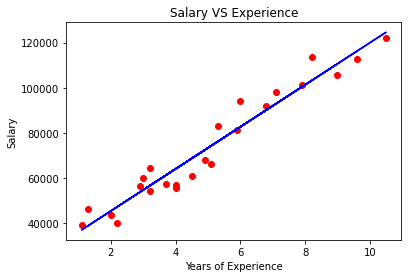

In [17]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "blue")
plt.title("Salary VS Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Visualizing the Testing data

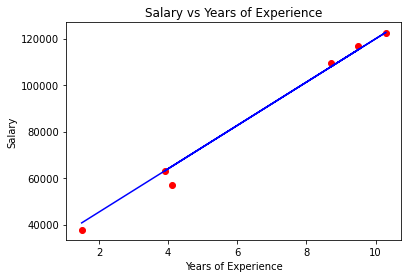

In [18]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color = "blue")
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Coefficient of Determination (R Square) and Adjusted R Square

In [27]:
import statsmodels.api as sm 

In [28]:
Xad = sm.add_constant(X)
reg = sm.OLS(y, Xad).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 07 Jul 2020   Prob (F-statistic):           1.14e-20
Time:                        13:54:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating the error

## Calculating the Mean Absolute Error

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mean_absolute_error(y_test, y_pred)

2446.1723690465064

## Calculating the Mean Squared Error

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test, y_pred)

12823412.298126562

## Calculating the Root Mean Squared Error (RMSE)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
np.sqrt(mean_squared_error(y_test, y_pred))

3580.979237321345

## Calculating the Root Mean Squared Log Error (RMSLE)

In [25]:
from sklearn.metrics import mean_squared_log_error

In [26]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.06204863611005742